In [1]:
import torch
torch.__version__

'2.3.1+cu121'

In [2]:
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [3]:
x_reshaped = x.reshape(1,9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [4]:
z = x.view(1,9)
z, x

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [5]:
# Since z is view of x and view just shares the same memeory to z as x.
z[:, 0] = 10.
z, x


(tensor([[10.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]]),
 tensor([10.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]))

In [6]:
# Stacking
# x_stacked = torch.stack([x,x,x], dim=0)
# x_stacked

x_stacked = torch.stack([x,x,x], dim=1)
print(x_stacked)

tensor([[10., 10., 10.],
        [ 2.,  2.,  2.],
        [ 3.,  3.,  3.],
        [ 4.,  4.,  4.],
        [ 5.,  5.,  5.],
        [ 6.,  6.,  6.],
        [ 7.,  7.,  7.],
        [ 8.,  8.,  8.],
        [ 9.,  9.,  9.]])


In [7]:
# Now squeezing the squeezed tensor

print(f"Previous x_reshaped: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# After squeezing the torch
x_squeezed = x_reshaped.squeeze()
print(f"Squeezed x_reshaped: {x_squeezed}")
print(f"Squeezed shape: {x_squeezed.shape}")

Previous x_reshaped: tensor([[10.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]])
Previous shape: torch.Size([1, 9])
Squeezed x_reshaped: tensor([10.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])
Squeezed shape: torch.Size([9])


In [8]:
# Now unsqueezing the squeezed tensor

# Unsqueezing at the zero dim
x_unsqueezed_dim_0 = x_squeezed.unsqueeze(dim=0)
print(f"Unsqueezed x_unsqueezed at dim 0 : {x_unsqueezed_dim_0}")
print(f"Unsqueezed x_unsqueezed at dim 0 shape: {x_unsqueezed_dim_0.shape}")

# Unsqueezing at the first dim
print("\n")
x_unsqueezed_dim_1 = x_squeezed.unsqueeze(dim=1)
print(f"Unsqueezed x_unsqueezed at dim 1: {x_unsqueezed_dim_1}")
print(f"Unsqueezed x_unsqueezed at dim 1 shape: {x_unsqueezed_dim_1.shape}")


Unsqueezed x_unsqueezed at dim 0 : tensor([[10.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]])
Unsqueezed x_unsqueezed at dim 0 shape: torch.Size([1, 9])


Unsqueezed x_unsqueezed at dim 1: tensor([[10.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.]])
Unsqueezed x_unsqueezed at dim 1 shape: torch.Size([9, 1])


In [9]:
# Permute the original tensor(image) to rearrange the axis(dim) order

x_image = torch.rand(size=(3, 224, 224)) # Image with 3 channel 224, 224 height and width

# Permutting the image tensor to rearrange the axis (dims) orders

x_permutted = x_image.permute(2,1,0)
print(f"Original Image Shape: {x_image.shape}")
print(f"Permutted Image Shape: {x_permutted.shape}")

Original Image Shape: torch.Size([3, 224, 224])
Permutted Image Shape: torch.Size([224, 224, 3])


In [10]:
# Permutted image is just reference the same memeory of the original image

x_image[0, 0, 0] = 10.
print(f"Original Image element at first index: {x_image[0,0,0]}")
print(f"Permutted Image element at first index: {x_permutted[0,0,0]}")


Original Image element at first index: 10.0
Permutted Image element at first index: 10.0


In [11]:
x_image_test = torch.rand(size=(2, 3, 3))
print(x_image_test)

# Permutting the image tensor to rearrange the axis (dims) orders

x_permutted_test = x_image_test.permute(2,1,0)
print(f"Original Image Shape: {x_image_test.shape}")
print(f"Permutted Image Shape: {x_permutted_test.shape}")
print(x_permutted_test)

tensor([[[0.1974, 0.7271, 0.7349],
         [0.0616, 0.5731, 0.1780],
         [0.5634, 0.6210, 0.0726]],

        [[0.1998, 0.6440, 0.9438],
         [0.7483, 0.3064, 0.4740],
         [0.3151, 0.0702, 0.2181]]])
Original Image Shape: torch.Size([2, 3, 3])
Permutted Image Shape: torch.Size([3, 3, 2])
tensor([[[0.1974, 0.1998],
         [0.0616, 0.7483],
         [0.5634, 0.3151]],

        [[0.7271, 0.6440],
         [0.5731, 0.3064],
         [0.6210, 0.0702]],

        [[0.7349, 0.9438],
         [0.1780, 0.4740],
         [0.0726, 0.2181]]])


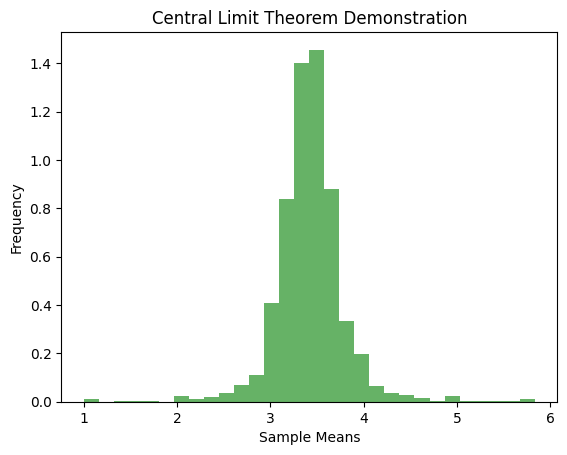

In [12]:
import numpy as np

import matplotlib.pyplot as plt

def central_limit_theorem(n_sample, size_random):
    result = []
    for i in range(1, size_random+1): 
        x_mean = [np.mean(np.random.randint(1, 7, i)) for _ in range(n_sample)]
        result.append(x_mean)
    return result

data = central_limit_theorem(10000, 100)

counts, bins = np.histogram(data, bins=30, density=True)

mask = counts > 0
filtered_counts = counts[mask]
filtered_bins = bins[:-1][mask]

plt.hist(filtered_bins, bins=len(filtered_bins), weights=filtered_counts, alpha=0.6, color='g')
plt.title('Central Limit Theorem Demonstration')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.show()


In [13]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [14]:
print(x[0])
print(x[0][0])
print(x[0][0][0])

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([1, 2, 3])
tensor(1)


In [15]:
print(x[:, 1, 1])

tensor([5])


In [16]:
print(x[0, 0, :]) 

tensor([1, 2, 3])


In [17]:
# Conerting the Numpy array to torch tensor

array = np.arange(1, 8) # The default dtype of numpy int64 for integers
tensor = torch.from_numpy(array)
print(f"Numpy array: {array} and dtyp is: {array.dtype}")
print(f"Torch tensor: {tensor} and dtype is: {tensor.dtype}")
print("\n")

array = np.arange(1.0, 8.0) # The default dtype of numpy is float64 for floatin point numbers
tensor = torch.from_numpy(array)
print(f"Numpy array: {array} and dtyp is: {array.dtype}")
print(f"Torch tensor: {tensor} and dtype is: {tensor.dtype}")

Numpy array: [1 2 3 4 5 6 7] and dtyp is: int64
Torch tensor: tensor([1, 2, 3, 4, 5, 6, 7]) and dtype is: torch.int64


Numpy array: [1. 2. 3. 4. 5. 6. 7.] and dtyp is: float64
Torch tensor: tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64) and dtype is: torch.float64


In [18]:
# The Deafult dtype for tensor in torch is float32 for floats and int64 for integers 

# Floats
tensor_org = torch.arange(1.0, 8.0)
print(f"Torch tensor float: {tensor_org} and original dtype is: {tensor_org.dtype}")
print("\n")

# Integers
tensor_org = torch.arange(1, 8)
print(f"Torch tensor float: {tensor_org} and original dtype is: {tensor_org.dtype}")

Torch tensor float: tensor([1., 2., 3., 4., 5., 6., 7.]) and original dtype is: torch.float32


Torch tensor float: tensor([1, 2, 3, 4, 5, 6, 7]) and original dtype is: torch.int64


In [19]:
# Changing the datatype of numpy array when converting numpy array to torch tensor

array = np.arange(1.0, 8.0)
print(f"Numpy array dtype: {array.dtype}")
tensor = torch.from_numpy(array).type(torch.float32)
print(f"Torch tensor dtype: {tensor.dtype}")

Numpy array dtype: float64
Torch tensor dtype: torch.float32


In [20]:
# If the tensor are created from the numpy array and we made modification to it doesn't reflect on torch tensors

array = np.arange(1.0, 8.0) 
tensor = torch.from_numpy(array)
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [21]:
# Converting the tensor from one datatype to another
print(f"Original dtype of tensor: {tensor.dtype}")
tensor = tensor.type(torch.int64)

print(f"Modified tensor dtype: {tensor.dtype}")

Original dtype of tensor: torch.float64
Modified tensor dtype: torch.int64


In [22]:
import mpmath
import numpy as np

def ramanujan_pi(n):
    mpmath.mp.dps = 1000
    total_sum = mpmath.mpf(0)
    for k in range(n):
        numerator = mpmath.fac(4 * k) * (1103 + 26390 * k)
        denominator = (mpmath.fac(k)**4) * (396**(4 * k))
        total_sum += numerator / denominator
    total = (2 * mpmath.sqrt(2) / 9801) * total_sum
    return 1 / total


In [23]:
pi_rama_value = ramanujan_pi(1000)
mpmath.mp.dps = 1000
pi_value = mpmath.mp.pi
print(f"Mpmath Pi value: {pi_value}")
print(f"Ramanujan Pi value: {pi_rama_value}")
if pi_rama_value == pi_value:
    print("True")
else:
    print("False")

Mpmath Pi value: 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609173637178721468440901224953430146549585371050792279689258923542019956112129021960864034418159813629774771309960518707211349999998372978049951059731732816096318595024459455346908302642522308253344685035261931188171010003137838752886587533208381420617177669147303598253490428755468731159562863882353787593751957781857780532171226806613001927876

In [24]:
# Converting the numpy torch tensor to numpy array

tensor = torch.ones(7)
print(f"Tensor: {tensor}, datatype:{tensor.dtype}")
numpy_array = tensor.numpy()
print(f"Converted Numpy array: {numpy_array}, datatype:{numpy_array.dtype}")

Tensor: tensor([1., 1., 1., 1., 1., 1., 1.]), datatype:torch.float32
Converted Numpy array: [1. 1. 1. 1. 1. 1. 1.], datatype:float32


In [28]:
# Creatig the random tensors 

tensor_A = torch.rand(3,3)
tensor_B = torch.rand(3,3)
print(tensor_A == tensor_B)

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])


In [29]:
# Creating the random tensor with a seed

RANDOM_SEED = 69

torch.manual_seed(RANDOM_SEED)
tensor_A = torch.rand(3,3)

torch.manual_seed(RANDOM_SEED)
tensor_B = torch.rand(3,3)

print(f"Random tensor A :{tensor_A}")
print(f"Random tensor B :{tensor_B}")
print(tensor_A == tensor_B)

Random tensor A :tensor([[0.8398, 0.8042, 0.1213],
        [0.5309, 0.6646, 0.4077],
        [0.0888, 0.2429, 0.7053]])
Random tensor B :tensor([[0.8398, 0.8042, 0.1213],
        [0.5309, 0.6646, 0.4077],
        [0.0888, 0.2429, 0.7053]])
tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])


In [33]:
# Running the Pytorch Tensor or pytorch object in the GPUs
!nvidia-smi

Sat Jun 29 13:55:11 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1060        Off |   00000000:01:00.0 Off |                  N/A |
| N/A   58C    P8              4W /   88W |       7MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [34]:
# Checking if the pytorch is configured corectly on GPUs

torch.cuda.is_available()

True

In [35]:
# Setting up the cuda or cpu 

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [36]:
torch.cuda.device_count()

1

In [41]:
# Comparing the compute of pytorch tensor in CPU and GPU

tensor = torch.tensor([1,2,3,4,5,6],device="cpu" )
print(f"Tensor: {tensor}, tensor on device:{tensor.device}")

tensor = torch.tensor([1,2,3,4,5,6],device="cpu" ) # Default device is always on CPU
print(f"Tensor: {tensor}, tensor on device:{tensor.device}")

Tensor: tensor([1, 2, 3, 4, 5, 6]), tensor on device:cpu
Tensor: tensor([1, 2, 3, 4, 5, 6]), tensor on device:cpu


In [42]:
# Moving the tensor from CPU to GPU

tensor_on_gpu = tensor.to(device)
print(f"Tensor: {tensor_on_gpu}, tensor on device:{tensor_on_gpu.device}")

Tensor: tensor([1, 2, 3, 4, 5, 6], device='cuda:0'), tensor on device:cuda:0


In [45]:
# Converting the tensor back to Numpy but we need to go back to CPU
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [53]:
# Moving the GPU tensor to CPU tensor and converting it to Numpy array
tensor_to_cpu = tensor_on_gpu.to("cpu").numpy()
print(tensor_on_gpu)
print(tensor_to_cpu)

# Or

tensor_to_cpu = tensor_on_gpu.cpu().numpy()
print(tensor_to_cpu)


cuda:0
[1 2 3 4 5 6]
[1 2 3 4 5 6]
